In [1]:
#Load the libraries
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
from sklearn.ensemble import RandomForestClassifier
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
#importing the data
data = pd.read_csv("SMSSpamCollection.csv",delimiter="\t",header=None) #Reading data
data.columns = ['Label','Text'] #Changing Column names 
print(data.shape)
data.head(10)

(5572, 2)


,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [3]:
#Summary of the dataset
data.describe()

,Label,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Text(0, 0.5, 'Count')

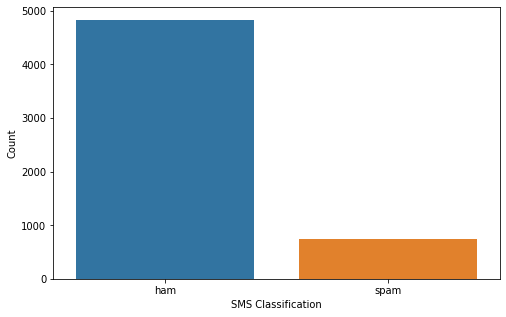

In [4]:
# Visualizing the count of 'spam' messages in the dataset
plt.figure(figsize=(8,5))
sns.countplot(x='Label', data=data)
plt.xlabel('SMS Classification')
plt.ylabel('Count')

In [5]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_between_brackets(text):
    return re.sub('[\!"#$%&\'()*+,-./:;<=>?@\][\\\^_`{|}~]'," ",text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_between_brackets(text)
    return text
#Apply function on review column
data['Cleaned']=data['Text'].apply(denoise_text)



#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
data['Cleaned']=data['Cleaned'].apply(remove_special_characters)

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
data['Cleaned']=data['Cleaned'].apply(simple_stemmer)

#set stopwords to english
stopword_list.extend(['aa','aah','aaniye','abj','ag','aaooooright','aathilove','aathiwhere','ab','abbey','u','r','k','p','n','c'])
print(stopword_list)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token.lower() for token in tokens if token.lower() not in stopword_list]
    #filtered_text = ' '.join(filtered_tokens)    
    return filtered_tokens
#Apply function on review column
data['Cleaned']=data['Cleaned'].apply(remove_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
all_words=[]
for text in data['Cleaned']:
    all_words=all_words + text

In [7]:
cleaned_word, value_count = np.unique(all_words,return_counts=True)

In [8]:
sorted_indices = np.argsort(-value_count)
print(sorted_indices)

[ 785 2182 2138 ... 2895 2898 6349]


In [9]:
cleaned_word=cleaned_word[sorted_indices]
value_count=value_count[sorted_indices]

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


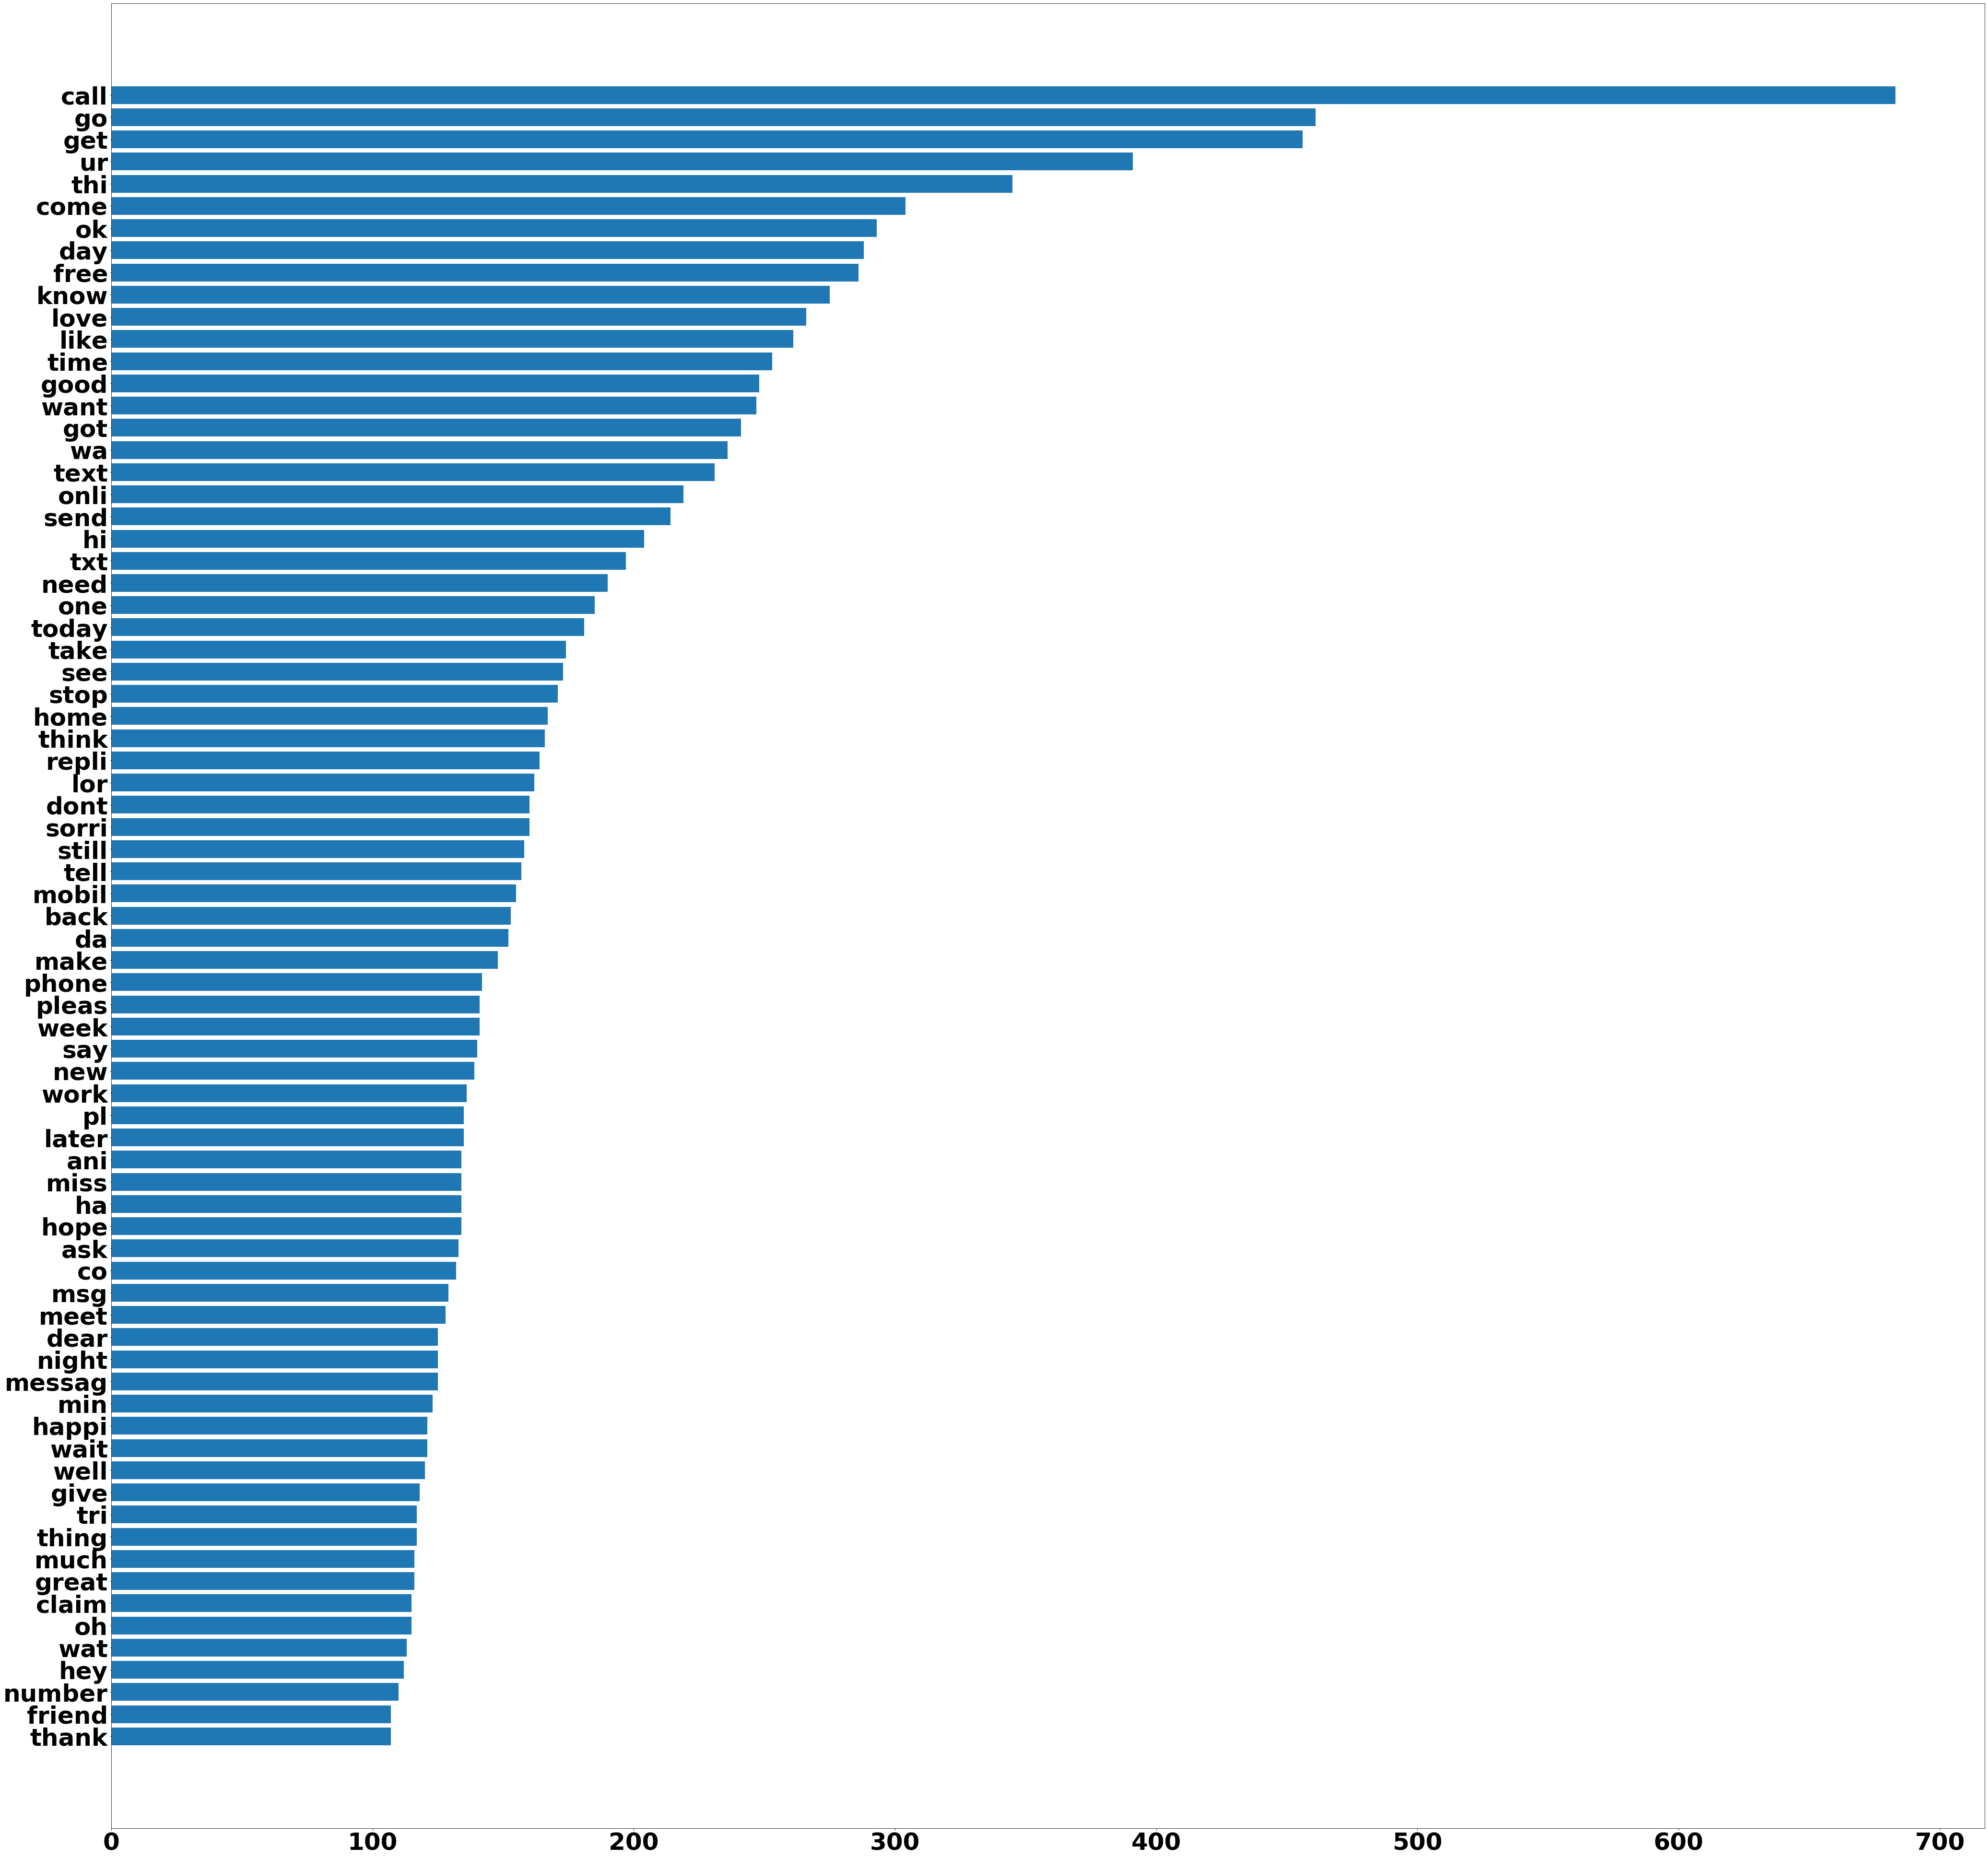

In [25]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(cleaned_word[:75], value_count[:75])
plt.gca().invert_yaxis()
plt.show()

In [10]:
#removing the stopwords
def join_tokens(text):
    
    tokens = [token.strip() for token in text]
    filtered_text = ' '.join(tokens)    
    return filtered_text
#Apply function on review column
data['Cleaned']=data['Cleaned'].apply(join_tokens)

In [11]:
for i in data['Cleaned'][:10]:
    print(i)
    print('*'*120)

go jurong point crazi avail onli bugi great world la e buffet cine got amor wat
************************************************************************************************************************
ok lar joke wif oni
************************************************************************************************************************
free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate appli
************************************************************************************************************************
dun say earli hor alreadi say
************************************************************************************************************************
nah think goe usf live around though
************************************************************************************************************************
freemsg hey darl week word back like fun still tb ok xxx std chg send rcv
********************************************************

In [12]:
data

,Label,Text,Cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail onli bugi great wo...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,thi nd time tri contact pound prize claim easi...
5568,ham,Will ü b going to esplanade fr home?,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",piti wa mood ani suggest
5570,ham,The guy did some bitching but I acted like i'd...,guy bitch act like interest buy someth els nex...


In [13]:
from sklearn.preprocessing import LabelEncoder
Encoder =LabelEncoder()
data['LabelEncoded']=Encoder.fit_transform(data['Label'])


In [14]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(data['Cleaned']).toarray()

In [15]:
# Extracting dependent variable from the dataset
y = data['LabelEncoded']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X, y,test_size=0.3,random_state=1234)

#Tfidf vectorizer
tf=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,max_features=2500)
#transformed train reviews
tf_data=tf.fit_transform(data['Text'])
print('Tfidf:',tf_data.shape)

#Lets consider TF-idf
Dense_mat = tf_data.todense()
A = pd.DataFrame(Dense_mat, columns=tf.get_feature_names())
A.shape
A.head()

## Implementing Naive Bayes

In [18]:
# Importing the required Libraries
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, accuracy_score

# Building the Naive Bayes Model
clf_train = MultinomialNB(alpha=0.2)

# Modelling Up on Train & Predicting up on Test
clf_train.fit(X_train, y_train)
pred = clf_train.predict(X_test)

In [19]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.0,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.0 is: 97.25%
Accuracy score for alpha=0.1 is: 98.27%
Accuracy score for alpha=0.2 is: 98.27%
Accuracy score for alpha=0.3 is: 98.33%
Accuracy score for alpha=0.4 is: 98.39%
Accuracy score for alpha=0.5 is: 98.03%
Accuracy score for alpha=0.6 is: 98.03%
Accuracy score for alpha=0.7 is: 97.85%
Accuracy score for alpha=0.8 is: 97.85%
Accuracy score for alpha=0.9 is: 97.85%
Accuracy score for alpha=1.0 is: 97.85%
--------------------------------------------
The best accuracy is 98.39% with alpha value as 0.4


In [20]:
train_pred = clf_train.predict(X_train)
prediction_train = confusion_matrix(y_train,train_pred)
prediction_train
acc = accuracy_score(y_train,train_pred)
rec = recall_score(y_train,train_pred,pos_label=1)
prec = precision_score(y_train,train_pred,pos_label=1)

# Printing the Metrics
print(prediction_train)
print(acc)
print(rec)
print(prec)

[[3357   21]
 [  18  504]]
0.99
0.9655172413793104
0.96


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


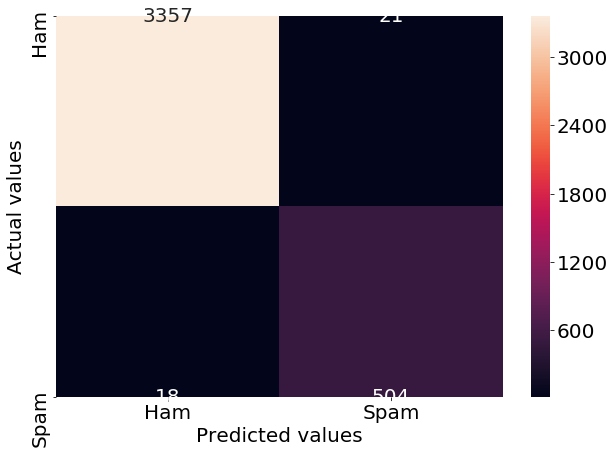

In [21]:
cm = confusion_matrix(y_train,train_pred)
# Plotting the confusion matrix
font = {'family' : 'normal',
        'size'   : 20}


plt.rc('font', **font)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True,fmt='d',annot_kws={"size": 20},xticklabels=['Ham','Spam'],yticklabels=['Ham','Spam'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [22]:
prediction = confusion_matrix(y_test,pred)
prediction

array([[1430,   17],
       [  12,  213]], dtype=int64)

In [23]:
acc = accuracy_score(y_test, pred)
rec = recall_score(y_test, pred,pos_label=1)
prec = precision_score(y_test, pred,pos_label=1)

# Printing the Metrics
print(acc)
print(rec)
print(prec)

0.9826555023923444
0.9466666666666667
0.9260869565217391


In [24]:
#Classification report for tfidf features
clf_train_report=classification_report(y_train,train_pred,target_names=['Ham','Spam'])
print(clf_train_report)
clf_test_report=classification_report(y_test,pred,target_names=['Ham','Spam'])
print(clf_test_report)

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      3378
        Spam       0.96      0.97      0.96       522

    accuracy                           0.99      3900
   macro avg       0.98      0.98      0.98      3900
weighted avg       0.99      0.99      0.99      3900

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99      1447
        Spam       0.93      0.95      0.94       225

    accuracy                           0.98      1672
   macro avg       0.96      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



## Predictions

In [46]:
def predict_text(text):
    text = denoise_text(text)
    text = remove_special_characters(text)
    text = simple_stemmer(text)
    text_tokens = remove_stopwords(text)
    final_text = ' '.join(text_tokens)
    text_vectorizer = cv.transform([final_text]).toarray()
    prediction =  clf_train.predict(text_vectorizer)
    prediction = int(prediction[0])
    if prediction == 1:
        print("This is a SPAM Message")
    else:
        print("This is a normal message")
    return prediction

In [61]:
test_message1 = 'You recieved 3 bitcoins($14,242 USD) in your account. \
Register to accept the transfer: https://bitcoinmine/232qq.com'

In [62]:
result = predict_text(test_message1)

This is a SPAM Message


In [59]:
test_message2 = 'Hey Lou, it’s Jon! Loved connecting with you. \
If you’re still looking for a freelancer let me know and we can talk next steps. Enjoy Vegas! Cheers, Jon.'

In [60]:
result = predict_text(test_message2)

This is a normal message


In [53]:
test_message3 = "Hi - I can't wait to speak to you again so I'm writing to you immediately after getting home."

In [54]:
result = predict_text(test_message3)

This is a normal message


In [57]:
test_message4 = '''A/c NN5715 debited for Rs 2000; ATM WDL.
A/c Bal(sub to chq realisatn) Rs13286.23 on 24APR 21:19hr. 
Call 1800226999 to block your card if not used by you.'''

In [58]:
result = predict_text(test_message4)

This is a normal message


In [63]:
test_message5 = '''Dear Customer, your Account Number XXXXXX6377 has been credited by Rs 215.000
being DBT/DBTL funds transfer on 19/05/2015 - CENTRAL BANK OF INDIA'''

In [64]:
result = predict_text(test_message5)

This is a normal message


In [65]:
test_message6 = '''The Samsung Electronics is pleased to inform you of the results derived from the E-mail Address Ballot Lottery
International Program (EABLIP) held to consolidate our numerous customers worldwide. 
You E-mail Address have won a cash prize of £500,000.00 (FIVE HUNDRED THOUSAND GREAT BRITISH POUNDS) 
and a 52 inch Widescreen Plasma TV with Built-In Home Theater System from Samsung Electronics with the following details'''

In [66]:
result = predict_text(test_message6)

This is a SPAM Message
